# Project: Titanic Data Science Solution
## Titanic Data

### Introduction
This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website (https://www.kaggle.com/c/titanic), where the data was obtained.


### Questions
In this analysis, I would like to explore the following questions.

## A
1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?
5. What factors helped someone survive the sinking?

## B
1. Was age a factor in determining the chances of survival?

2. Did women had a better survival rate than men?

3. How was children's survival rate as compared to men or women?

4. Was Socio-economic status or paasenger class a factor in determining the survival rate?

### Data Dictionary

 - survival: Survival (0 = No, 1 = Yes)
 - pclass: Ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)
 - sex: Sex
 - Age: Age in years
 - sibsp: Number of siblings / spouses aboard the Titanic
 - parch: Number of parents / children aboard the Titanic
 - ticket: Ticket number
 - fare:Passenger fare
 - cabin:Cabin number
 - embarked:Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)

**pclass**: A proxy for socio-economic status (SES)
 -1st = Upper
 -2nd = Middle
 -3rd = Lower

**Age**: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
 - Sibling = brother, sister, stepbrother, stepsister
 - Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
-  Parent = mother, father
-  Child = daughter, son, stepdaughter, stepson
-  Some children travelled only with a nanny, therefore parch=0 for them

In [30]:
# importing  required libraries
import pandas as pd
from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Render plots inline
%matplotlib inline

In [163]:
# import data from csv file
titanic_df = pd.read_csv('train.csv')

# Checking the number of rows(observations) and colmumns(variables)
titanic_df.shape

(891, 12)

In [32]:
titanic_df.head(10) # Looking at first few rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [33]:
# get overall info for the dataset 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


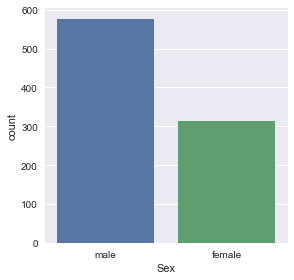

In [37]:
sns.factorplot('Sex', data=titanic_df, kind="count") ## Let's check gender

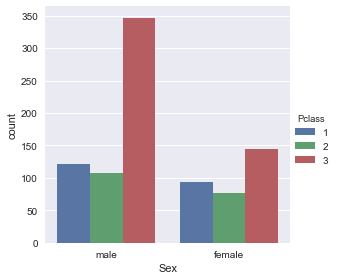

In [38]:
# Now let's seperate the genders by classes, we can use the 'hue' arguement here!

sns.factorplot('Sex', data=titanic_df, kind="count", hue='Pclass')

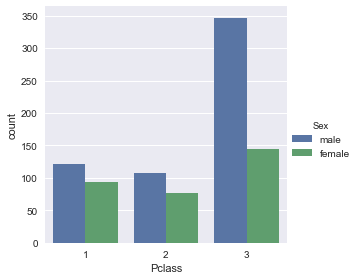

In [39]:
sns.factorplot('Pclass', data=titanic_df, kind="count", hue='Sex')

Wow, quite a few more males in the 3rd class than females, an interesting find. However, it might be useful to know the split between males,females,and children. 

In [40]:
# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# First let's make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

In [41]:
# Define a new column called 'person', remember to specify axis=1 for columns and not index

titanic_df['Person']= titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [42]:
# Let's see if this worked, check out the first ten rows
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Excellent! Now we have seperated the passengers between female,male,and child. This will be important later on beacuse of the famous "Women and children first policy"!

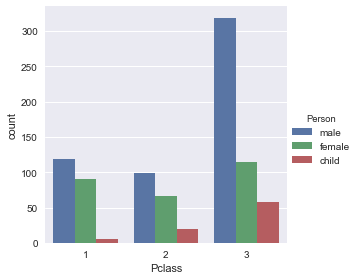

In [44]:
# Let's try the factorplot again!
sns.factorplot('Pclass', data=titanic_df, kind="count", hue='Person')

Interesting, quite a bit of children in 3rd class and not so many in 1st! How about we create a distribution of the ages to get a more precise picture of the who the passengers were.

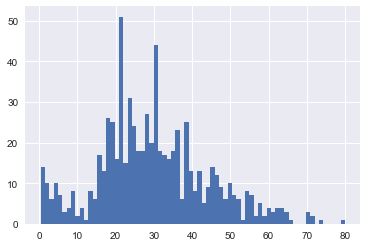

In [45]:
# Quick way to create a histogram using pandas
titanic_df['Age'].hist(bins=70)

In [46]:
titanic_df['Age'].mean() # Get the mean of Age

29.69911764705882

In [48]:
# We could also get a quick overall comparison of male,female,child

titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

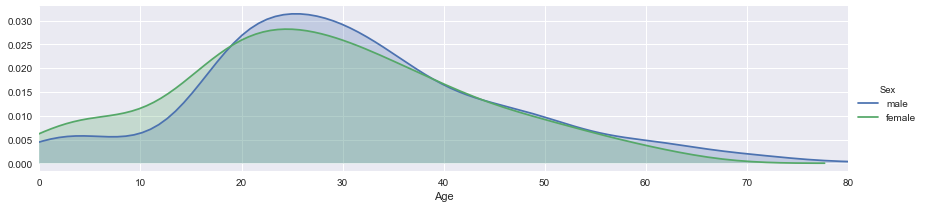

In [50]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

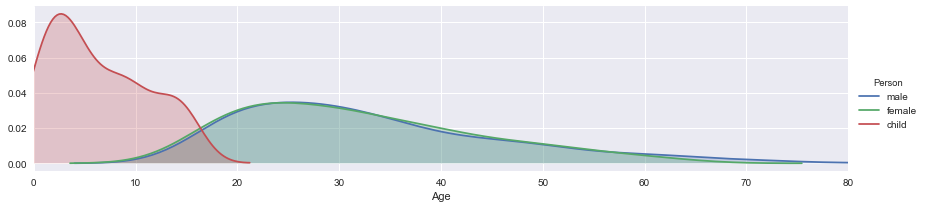

In [54]:
# We could have done the same thing for the 'person' column to include children:

fig = sns.FacetGrid(titanic_df, hue='Person', aspect=4)

fig.map(sns.kdeplot, 'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim= (0,oldest))

fig.add_legend()

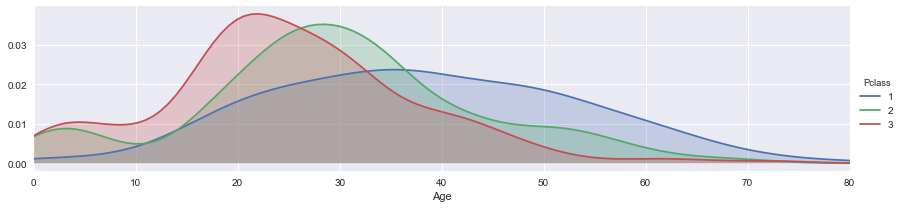

In [55]:
# Let's do the same for class by changing the hue argument:

fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)

fig.map(sns.kdeplot, 'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim= (0,oldest))

fig.add_legend()

In [56]:
# Let's get a quick look at our dataset again

titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


We can see that the Cabin column has information on the deck, but it has several NaN values, so we'll have to drop them.


In [57]:
# First we'll drop the NaN values and create a new object, deck

deck = titanic_df['Cabin'].dropna()

In [58]:
# Quick preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)


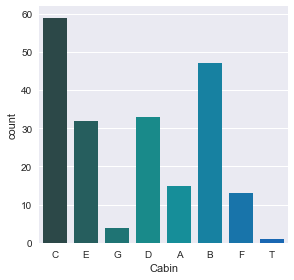

In [61]:
# So let's grab that letter for the deck level with a simple for loop
# Set empty list
levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.factorplot('Cabin', data=cabin_df, palette='winter_d',kind='count')

Interesting to note we have a 'T' deck value there which doesn't make sense, we can drop it out with the following code:


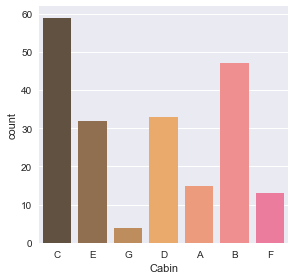

In [69]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.factorplot('Cabin', data=cabin_df, palette='spring_d',kind='count')

Check out this link for more palette names, we can add '_d' to the end of any palette name to make it darker.

Link: http://matplotlib.org/users/colormaps.html

Great now that we've analyzed the distribution by decks, let's go ahead and answer for below question:

-Where did the passengers come from?

In [70]:
titanic_df.head(10) # Let's take another look at our original data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Note here that the Embarked column has C,Q,and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

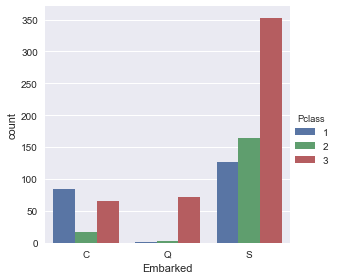

In [72]:
# Now, make a quick factorplot to check out the results, note the x_order argument, used to deal with NaN values

sns.factorplot('Embarked', data=titanic_df, hue = 'Pclass', x_order=['C','Q','S'],kind='count')

An interesting find here is that in Queenstown, almost all the passengers that boarded there were 3rd class. It would be intersting to look at the economics of that town in that time period for further investigation.

Next question:
-Who was alone and who was with family?

In [105]:
# Let's start by adding a new column to define alone

# add the parent/child column with the sibsp column

titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

Now we know that if the Alone column is anything but 0, then the passenger had family aboard and wasn't alone. So let's change the column now so that if the value is greater than 0, we know the passenger was with his/her family, otherwise they were alone.


In [106]:
# Look for >0 or ==0 to set alone status
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [107]:
# Check to make sure it worked

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [108]:
titanic_df['Alone']

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
5            Alone
6            Alone
7      With Family
8      With Family
9      With Family
10     With Family
11           Alone
12           Alone
13     With Family
14           Alone
15           Alone
16     With Family
17           Alone
18     With Family
19           Alone
20           Alone
21           Alone
22           Alone
23           Alone
24     With Family
25     With Family
26           Alone
27     With Family
28           Alone
29           Alone
          ...     
861    With Family
862          Alone
863    With Family
864          Alone
865          Alone
866    With Family
867          Alone
868          Alone
869    With Family
870          Alone
871    With Family
872          Alone
873          Alone
874    With Family
875          Alone
876          Alone
877          Alone
878          Alone
879    With Family
880    With Family
881          Alone
882         

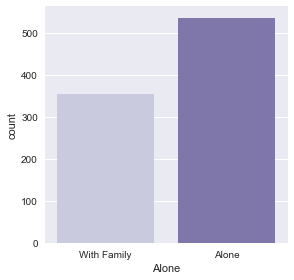

In [111]:
# Now let's get a simple visualization!

sns.factorplot('Alone', data=titanic_df, palette='Purples', kind='count')

Great! Now that we throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: What factors helped someone survive the sinking?

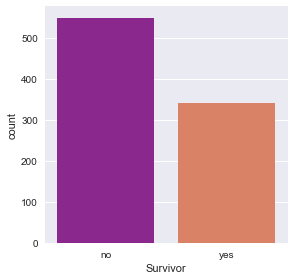

In [114]:
# Let's start by creating a new column for legibility purposes through mapping
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

# Let's just get a quick overall view of survied vs died. 
sns.factorplot('Survivor', data=titanic_df, palette='plasma', kind='count')

So quite a few more people died than those who survived. Let's see if the class of the passengers had an effect on their survival rate.

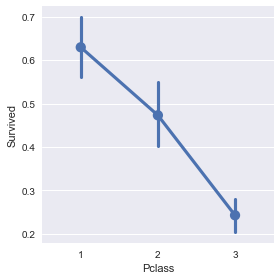

In [115]:
# use a factor plot again, but now considering class

sns.factorplot('Pclass','Survived',data=titanic_df)

Look like survival rates for the 3rd class are substantially lower! But maybe this effect is being caused by the large amount of men in the 3rd class in combination with the women and children first policy. Let's use 'hue' to get a clearer picture on this.

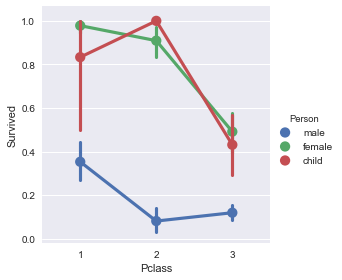

In [116]:
# Let's use a factor plot again, but now considering class and gender

sns.factorplot('Pclass', 'Survived', hue='Person', data=titanic_df)

From this data it looks like being a male or being in 3rd class were both not favourable for survival. Even regardless of class the result of being a male in any class dramatically decreases your chances of survival.

But what about age? Did being younger or older have an effect on survival rate?

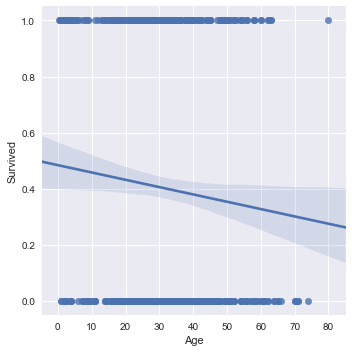

In [117]:
# Use a linear plot on age versus survival

sns.lmplot('Age','Survived', data=titanic_df)

Looks like there is a general trend that the older the passenger was, the less likely they survived.

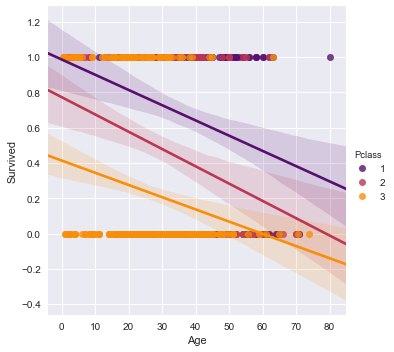

In [118]:
# Let's use a linear plot on age versus survival using hue for class seperation

sns.lmplot('Age','Survived',hue='Pclass', data=titanic_df, palette='inferno')

We can also use the x_bin argument to clean up this figure and grab the data and bin it by age with a std attached!

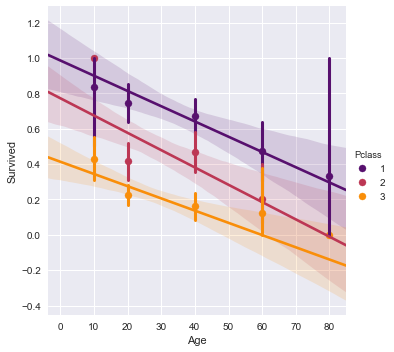

In [119]:
# Let's use a linear plot on age versus survival using hue for class seperation

# For X_bins
generations=[10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass', data=titanic_df, palette='inferno',x_bins=generations)

Interesting find on the older 1st class passengers! What about if we relate gender and age with the survival set?


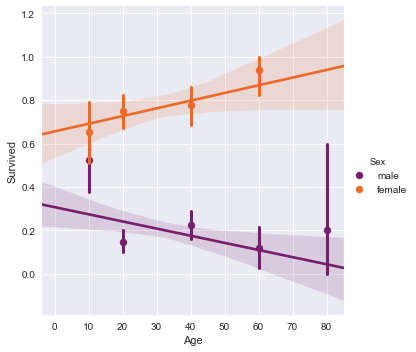

In [120]:
sns.lmplot('Age','Survived',hue='Sex', data=titanic_df, palette='inferno',x_bins=generations)

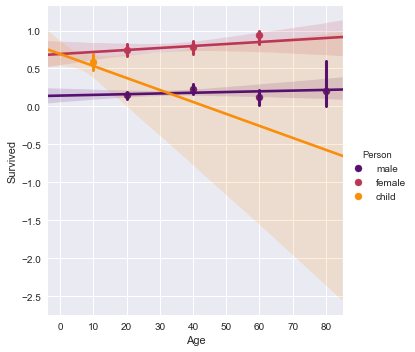

In [121]:
sns.lmplot('Age','Survived',hue='Person', data=titanic_df, palette='inferno',x_bins=generations)

Awesome! got some really great insights on how gender,age, and class all related to a passengers chance of survival.

I would like to explore more with the following questions:
    
-Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
-Did having a family member increase the odds of surviving the crash?


In [122]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


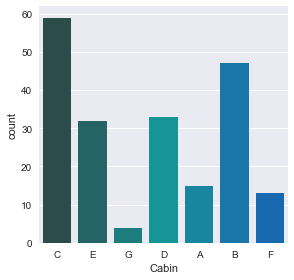

In [126]:
sns.factorplot('Cabin', data=cabin_df, palette='winter_d',kind='count')

In [127]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


In [150]:
cabin_df = pd.concat([cabin_df, titanic_df['Sex']], axis=1)

In [152]:
cabin_df = pd.concat([cabin_df, titanic_df['Survived']], axis=1)

In [153]:
cabin_df.head()

,Cabin,Sex,Survived
0,C,male,0
1,C,female,1
2,E,female,1
3,G,female,1
4,C,male,0


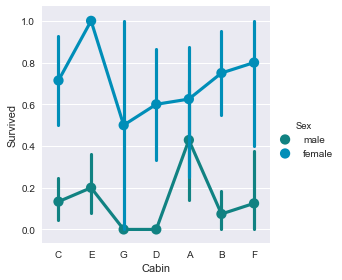

In [157]:
sns.factorplot('Cabin','Survived',data=cabin_df, hue='Sex', palette='winter_d')

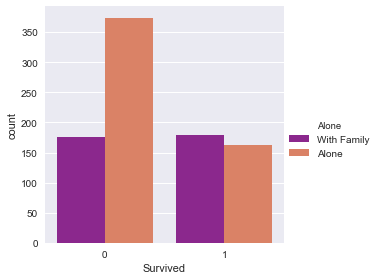

In [162]:
sns.factorplot('Survived',data=titanic_df, hue='Alone',palette='plasma',kind='count')

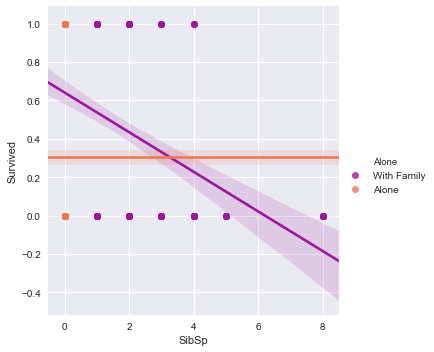

In [160]:
sns.lmplot('SibSp','Survived',data=titanic_df, hue='Alone',palette='plasma')

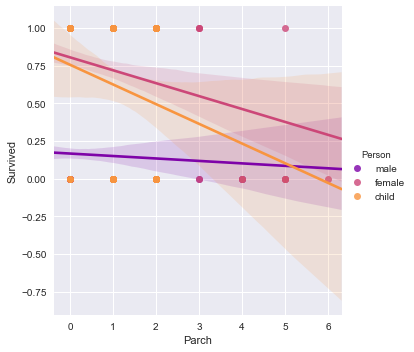

In [138]:
sns.lmplot('Parch','Survived',data=titanic_df, hue='Person',palette='plasma')

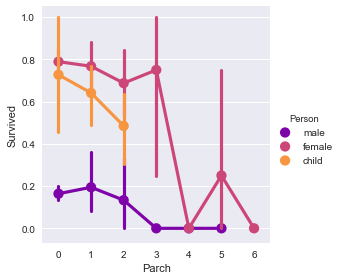

In [143]:
sns.factorplot('Parch','Survived',data=titanic_df, hue='Person',palette='plasma')

### Conclsion:

Our complete analysis mainly covered three factors in this anlysis (Age, Sex, Pclass). 
> - Age: Doesn't play much role in determining the survival chances, except for ages below 1 years. 
- Sex: Women had better chances of survival than men. 
- In general, Women & children across all classes had higer survival rates than men.
- Pclass: Pclass-1 had best while Pclass-3 has the worst survival rate. 

So we can say, that being a women in Pclass-1 seems to have the best chances of survival. However being a child or woman could not be considered as 100% survival chance.

**Limitations**

- The Age data was incomplete. Almost 20% of the age values were missing. We chose to remove the rows with missng values instead of imputing it with mean/median which would otherwise impact any descriptive statistics. So, we had even smaller sample size, which is less representative of the whole population that boarded Titanic. 
- Since we didnot have a clear age demarcation for children vs adults, we assumed the cutt off value for age of chidren as 16 years. This might have have skewed some of the numbers. 



### References:

- https://www.kaggle.com/c/titanic/data
- http://seaborn.pydata.org/generated/seaborn.factorplot.html#seaborn.factorplot
- https://stackoverflow.com/questions/19584029/plotting-histograms-from-grouped-data-in-a-pandas-dataframe
- http://www.titanicfacts.net/titanic-victims.html
- https://stackoverflow.com/questions/1413681/python-with-matplotlib-reusing-drawing-functions
